In [1]:
import sys
sys.path.append("..")

import minitorch
import matplotlib.pyplot as plt
import random
import datasets

In [2]:
PTS = 50
DATASET = datasets.Simple(PTS, vis=True)
HIDDEN = 2
RATE = 0.5

Setting up a new session...


Set-up a binary classifier being a 3-layer NN with ReLU activation and sigmoid output

In [3]:
class Network(minitorch.Module):
    def __init__(self):
        super().__init__()

        # Submodules
        self.layer1 = Linear(2, HIDDEN)
        self.layer2 = Linear(HIDDEN, HIDDEN)
        self.layer3 = Linear(HIDDEN, 1)

    def forward(self, x):
        h = [h.relu() for h in self.layer1.forward(x)]
        h = [h.relu() for h in self.layer2.forward(h)]
        return self.layer3.forward(h)[0].sigmoid()

In [4]:
class Linear(minitorch.Module):
    "Simple linear layer with all weights represented by `Scalar`"
    
    def __init__(self, in_size, out_size):
        super().__init__()
        self.weights = []
        self.bias = []
        for i in range(in_size):
            self.weights.append([])
            for j in range(out_size):
                self.weights[i].append(
                    self.add_parameter(
                        f"weight_{i}_{j}", minitorch.Scalar(2 * (random.random() - 0.5))
                    )
                )
        for j in range(out_size):
            self.bias.append(
                self.add_parameter(
                    f"bias_{j}", minitorch.Scalar(2 * (random.random() - 0.5))
                )
            )

    def forward(self, inputs):
        y = [b.value for b in self.bias]
        for i, x in enumerate(inputs):
            for j in range(len(y)):
                y[j] = y[j] + x * self.weights[i][j].value
        return y

In [5]:
model = Network()
data = DATASET
losses = []

In [6]:
data.X[:2]

[(0.04949386592842675, 0.6573716645230362),
 (0.013585840230311175, 0.019544645066831734)]

In [7]:
data.y[:2]

[1, 1]

In [8]:
x_1, x_2 = data.X[0]
y = data.y[0]
x_1 = minitorch.Scalar(x_1)
x_2 = minitorch.Scalar(x_2)

In [9]:
out = model.forward((x_1, x_2))

In [10]:
out

Scalar(0.521801)

In [11]:
loss = -out.log()

In [12]:
loss

Scalar(0.650468)

In [13]:
model.layer1.parameters()

dict_values([Scalar(0.446945), Scalar(0.586496), Scalar(0.083623), Scalar(-0.533186), Scalar(0.646276), Scalar(-0.154666)])

In [7]:
from ipdb import launch_ipdb_on_exception

Epoch  0  loss  34.923432063426766 correct 27
Epoch  10  loss  34.546020972778884 correct 27
Epoch  20  loss  34.3422082075232 correct 27
Epoch  30  loss  34.03897745616302 correct 27
Epoch  40  loss  33.22313564916838 correct 27
Epoch  50  loss  30.681471296030736 correct 42
Epoch  60  loss  26.477073568743425 correct 38
Epoch  70  loss  20.14692031295453 correct 44
Epoch  80  loss  14.706530253793446 correct 48
Epoch  90  loss  10.924208117805486 correct 50
Epoch  100  loss  9.594854558700833 correct 49
Epoch  110  loss  15.165886380444764 correct 44
Epoch  120  loss  6.39933326000242 correct 50
Epoch  130  loss  5.202099386935146 correct 50
Epoch  140  loss  4.145769410894841 correct 50
Epoch  150  loss  3.6193735631712394 correct 50
Epoch  160  loss  3.1972298730566306 correct 50
Epoch  170  loss  2.8197935397211555 correct 50
Epoch  180  loss  2.5480151398155337 correct 50
Epoch  190  loss  2.3191837027217073 correct 50
Epoch  200  loss  2.1237575520129814 correct 50
Epoch  210  l

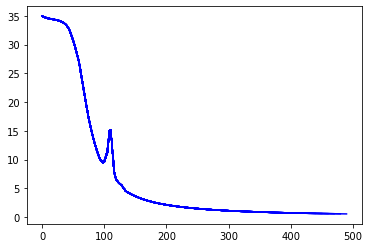

In [15]:
for epoch in range(500):
    total_loss = 0.0
    correct = 0

    # Forward
    for i in range(data.N):
        x_1, x_2 = data.X[i]
        y = data.y[i]
        x_1 = minitorch.Scalar(x_1)
        x_2 = minitorch.Scalar(x_2)
        out = model.forward((x_1, x_2))

        if y == 1:
            prob = out
            correct += 1 if out.data > 0.5 else 0
        else:
            prob = -out + 1.0
            correct += 1 if out.data < 0.5 else 0

        loss = -prob.log()
        # with launch_ipdb_on_exception():
        loss.backward()
        total_loss += loss.data

    # Update
    losses.append(total_loss)
    for p in model.parameters():
        if p.value.derivative is not None:
            p.update(
                minitorch.Scalar(p.value.data - RATE * (p.value.derivative / data.N))
            )

    # Logging
    if epoch % 10 == 0:
        print("Epoch ", epoch, " loss ", total_loss, "correct", correct)
        im = f"Epoch: {epoch}"
        data.graph(
            im,
            lambda x: model.forward(
                (minitorch.Scalar(x[0]), minitorch.Scalar(x[1]))
            ).data,
        )
        plt.plot(losses, c="blue")
        data.vis.matplot(plt, win="loss")

In [16]:
PTS = 50
DATASET = datasets.Xor(PTS, vis=True)
HIDDEN = 10
RATE = 0.5

Setting up a new session...


Epoch  0  loss  33.571627662905804 correct 30
Epoch  10  loss  30.786279100448 correct 31
Epoch  20  loss  29.36182587550234 correct 31
Epoch  30  loss  28.065186209055756 correct 38
Epoch  40  loss  26.872782760711928 correct 38
Epoch  50  loss  25.826492909477455 correct 38
Epoch  60  loss  24.86604027537892 correct 39
Epoch  70  loss  26.432730244511998 correct 39
Epoch  80  loss  25.54620039421402 correct 39
Epoch  90  loss  24.84863242315915 correct 39
Epoch  100  loss  24.348629773588723 correct 39
Epoch  110  loss  26.002180236948877 correct 39
Epoch  120  loss  24.971385396942374 correct 39
Epoch  130  loss  24.988836514204394 correct 39
Epoch  140  loss  24.544329282898325 correct 39
Epoch  150  loss  24.96482913343386 correct 39
Epoch  160  loss  25.31722811451528 correct 39
Epoch  170  loss  24.657466797164634 correct 39
Epoch  180  loss  24.177246904295448 correct 39
Epoch  190  loss  24.21708952583486 correct 39
Epoch  200  loss  23.893785577923783 correct 39
Epoch  210  l

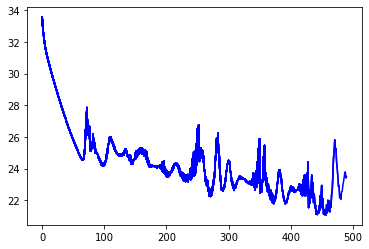

In [18]:
model = Network()
data = DATASET
losses = []

for epoch in range(500):
    total_loss = 0.0
    correct = 0

    # Forward
    for i in range(data.N):
        x_1, x_2 = data.X[i]
        y = data.y[i]
        x_1 = minitorch.Scalar(x_1)
        x_2 = minitorch.Scalar(x_2)
        out = model.forward((x_1, x_2))

        if y == 1:
            prob = out
            correct += 1 if out.data > 0.5 else 0
        else:
            prob = -out + 1.0
            correct += 1 if out.data < 0.5 else 0

        loss = -prob.log()
        # with launch_ipdb_on_exception():
        loss.backward()
        total_loss += loss.data

    # Update
    losses.append(total_loss)
    for p in model.parameters():
        if p.value.derivative is not None:
            p.update(
                minitorch.Scalar(p.value.data - RATE * (p.value.derivative / data.N))
            )

    # Logging
    if epoch % 10 == 0:
        print("Epoch ", epoch, " loss ", total_loss, "correct", correct)
        im = f"Epoch: {epoch}"
        data.graph(
            im,
            lambda x: model.forward(
                (minitorch.Scalar(x[0]), minitorch.Scalar(x[1]))
            ).data,
        )
        plt.plot(losses, c="blue")
        data.vis.matplot(plt, win="loss")